# **QNO1**

In [1]:
D2 = [("x1", "c1"),("x2", "c2"),("x3", "c3"),("x4", "c2"),("x5", "c2"),("x6", "c3"),("x7", "c1"),("x8", "c3"),("x9", "c2"),
    ("x10", "c2"),("x11", "c3"),("x12", "c2")]

In [2]:
import random

def class_stratified_sample(data, sample_size):
  class_counts = {}
  for feature_vector, class_label in data:
    if class_label not in class_counts:
      class_counts[class_label] = 0
    class_counts[class_label] += 1

  sampled_data = []
  for class_label in class_counts.keys():
    num_samples = int(sample_size * class_counts[class_label] / sum(class_counts.values()))
    sampled_data.extend(random.sample(list(filter(lambda x: x[1] == class_label, data)), num_samples))

  return sampled_data

# lass-stratified sample of D2 with size 6.
D2_tr = class_stratified_sample(D2, 6)
D2_tr

[('x7', 'c1'),
 ('x4', 'c2'),
 ('x10', 'c2'),
 ('x2', 'c2'),
 ('x3', 'c3'),
 ('x11', 'c3')]

# QNO2

In [3]:
# Joint distribution function
joint_distribution = {
    (0, 1): {0: 0.1, 1: 0.0},
    (0, 1): {0: 0.3, 1: 0.0},
    (0, 1): {0: 0.2, 1: 0.0},
    (1, 0): {0: 0.0, 1: 0.2},
    (1, 0): {0: 0.0, 1: 0.1},
    (0, 0): {0: 0.1, 1: 0.0}
}

# Bayes classifier
bayes_classifier = {
    (0, 1): 1,  
    (1, 0): 0,
    (0, 0): 0   
}

# Display the joint distribution
print("Joint Distribution:")
print("x\tc\tp(x, c)")
for x, c_dict in joint_distribution.items():
    for c, prob in c_dict.items():
        print(f"{x}\t{c}\t{prob}")

Joint Distribution:
x	c	p(x, c)
(0, 1)	0	0.2
(0, 1)	1	0.0
(1, 0)	0	0.0
(1, 0)	1	0.1
(0, 0)	0	0.1
(0, 0)	1	0.0


In [4]:
#the Bayes classifier
print("\nBayes Classifier:")
print("x\ty*(x)")
for x, y_star in bayes_classifier.items():
    print(f"{x}\t{y_star}")


Bayes Classifier:
x	y*(x)
(0, 1)	1
(1, 0)	0
(0, 0)	0


In [5]:
# True misclassification rate Err*
err_star = sum(joint_distribution[x][c] for x, c in bayes_classifier.items() if c != bayes_classifier[x])

# Display the result
print(f"True Misclassification Rate (Err*): {err_star}")

True Misclassification Rate (Err*): 0


# QNO3

# A)

In [6]:
# Given dataset
D = [((1, 1), 1), ((-1, 1), -1), ((1, 1), -1), ((1, 1), 1), ((1, 1), -1),((-1, 1), 1), ((1, 1), -1), ((-1, -1), -1), ((1, 1), 1), ((1, -1), 1)]

# Learning algorithm
def Learn(D, pi):
    L_plus = 0
    L_minus = 0
    for (x, cx) in D:
        if x[pi - 1] != cx:
            L_plus += 1
        if (-x[pi - 1]) != cx:
            L_minus += 1
    if L_plus <= L_minus:
        return 1
    else:
        return -1

In [7]:
# Training classifier y1()
pi_1 = 1
w_1 = Learn(D, pi_1)

# Training error Err:
err_y1 = sum(1 for (x, c) in D if w_1 * x[pi_1 - 1] != c) / len(D)

# Display results
print(f"Classifier y1() parameter w: {w_1}")
print(f"Training error Err(y1(), D): {err_y1}")

Classifier y1() parameter w: 1
Training error Err(y1(), D): 0.4


# B)

In [8]:
# Test set
D_test = [((1, -1), -1), ((1, 1), 1), ((1, -1), 1)]

# Training classifier y1 on D over D_test
D_train = [example for example in D if example not in D_test]
w_1_prime = Learn(D_train, pi_1)

# Holdout error Err on (y1, D_test)
err_y1_prime = sum(1 for (x, c) in D_test if w_1_prime * x[pi_1 - 1] != c) / len(D_test)

# Display results
print(f"Classifier y1'() parameter w: {w_1_prime}")
print(f"Holdout error Err(y1'(), D_test): {err_y1_prime}")

Classifier y1'() parameter w: -1
Holdout error Err(y1'(), D_test): 0.6666666666666666


# C)

In [9]:
# Validation sets
D_val_1 = [((1, 1), 1), ((-1, 1), -1), ((1, 1), -1), ((1, 1), 1)]
D_val_2 = [((1, 1), -1), ((-1, 1), 1), ((1, 1), -1)]

# Model selection
err_min = float('inf')
pi_star = None

for pi_candidate in range(1, 3):
    w_candidate = Learn(D_val_1, pi_candidate)
    err_val_1 = sum(1 for (x, c) in D_val_1 if w_candidate * x[pi_candidate - 1] != c) / len(D_val_1)
    err_val_2 = sum(1 for (x, c) in D_val_2 if w_candidate * x[pi_candidate - 1] != c) / len(D_val_2)
    total_err = err_val_1 + err_val_2

    if total_err < err_min:
        err_min = total_err
        pi_star = pi_candidate

In [13]:
# Training classifier y_pi_star() on the entire data:
w_pi_star = Learn(D, pi_star)

# Holdout error Err:
err_pi_star_val = sum(1 for (x, c) in D if w_pi_star * x[pi_star - 1] != c) / len(D)

# Display results
print(f"Optimal hyperparameter pi*: {pi_star}")
print(f"Classifier y_pi_star parameter w: {w_pi_star}")
print(f"Holdout error Err:: {err_pi_star_val}")

Optimal hyperparameter pi*: 2
Classifier y_pi_star parameter w: 1
Holdout error Err:: 0.5


# QNO4

# A)


**Definitions of concepts**



*   **True Positive (TP):** Spam correctly classified as spam
*   **False Positive (FP):** Non-spam incorrectly classified as spam
*   **False Negative (FN):** Spam incorrectly classified as non-spam
*   **True Negative (TN):** Non-spam correctly classified as non-spam
*   **False Positive Rate (FPR):** FP / (FP + TN)
*   **True Positive Rate (TPR) or Sensitivity or Recall:** TP / (TP + FN)















# B)

In [14]:
# Balanced class distribution P(C=0) = P(C=1) = 0.5
p_c0 = 0.5
p_c1 = 0.5

# Classifiers
classifiers = {
    "All Spam": {"TP": 0.5, "FP": 0.5},
    "All Non-Spam": {"TP": 0, "FP": 0},
    "All Correct": {"TP": 0.5, "FP": 0},
    "All Incorrect": {"TP": 0, "FP": 0.5},
    "Random": {"TP": 0.5, "FP": 0.5},
}

In [15]:
# Calculate False positive and true positive rate for each classifier:
for classifier, values in classifiers.items():
    values["FPR"] = values["FP"] / (values["FP"] + p_c0)
    values["TPR"] = values["TP"] / (values["TP"] + p_c1)

# Display results
for classifier, values in classifiers.items():
    print(f"{classifier}: FPR = {values['FPR']:.2f}, TPR = {values['TPR']:.2f}")

All Spam: FPR = 0.50, TPR = 0.50
All Non-Spam: FPR = 0.00, TPR = 0.00
All Correct: FPR = 0.00, TPR = 0.50
All Incorrect: FPR = 0.50, TPR = 0.00
Random: FPR = 0.50, TPR = 0.50


# C)

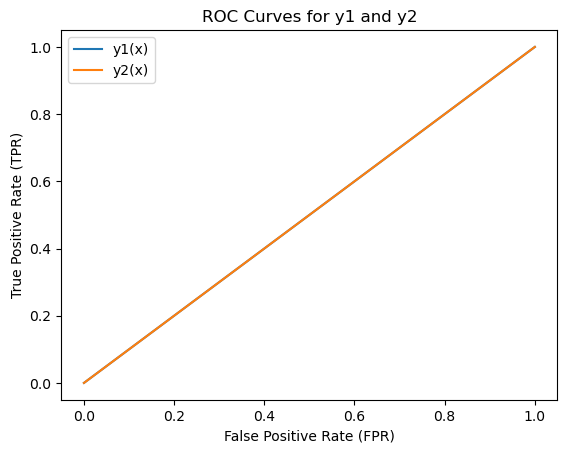

In [16]:
import matplotlib.pyplot as plt

# Simulate ROC curves
w0_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Classifier y1(x)
tpr_y1 = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]
fpr_y1 = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]

# Classifier y2(x)
tpr_y2 = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]
fpr_y2 = [1.0, 0.8, 0.6, 0.4, 0.2, 0.0]

# Plot ROC curves
plt.plot(fpr_y1, tpr_y1, label='y1(x)')
plt.plot(fpr_y2, tpr_y2, label='y2(x)')
plt.title('ROC Curves for y1 and y2')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# D)



The Receiver Operating Characteristic (ROC) curve summarizes the trade-off between a classifier's ability to correctly identify positive instances (True Positive Rate or Sensitivity) and its tendency to incorrectly classify negative instances (False Positive Rate or Fall-out) at different classification thresholds. A perfect classifier is represented at the top-left corner of the curve (TPR = 1, FPR = 0). The choice of a preferred classifier is subjective and depends on the specific requirements and acceptable trade-offs for false positives and false negatives in the application.